In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.style
import matplotlib as mp
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from plotly.offline import plot
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline

In [2]:
#Generate Swiss roll dataset.
X_swiss, Y_swiss = datasets.make_swiss_roll(n_samples = 1000,noise =0.2, random_state = 42)

print("Shape of Dataset is -: ", X_swiss.shape)
print("Shape of Target is -: ", Y_swiss.shape)

Shape of Dataset is -:  (1000, 3)
Shape of Target is -:  (1000,)


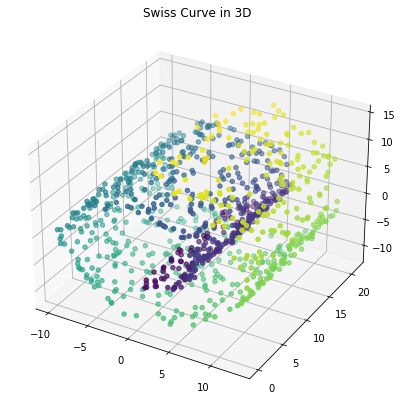

In [3]:
#Plot the resulting generated Swiss roll dataset.
fig_swiss = plt.figure(figsize=(7,7))
ax = fig_swiss.add_subplot(111, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c = Y_swiss)
plt.title('Swiss Curve in 3D')
plt.show()

In [4]:
#Use Kernel PCA (kPCA) with linear kernel (2 points), a RBF kernel (2 points), and a sigmoid kernel (2 points). [6 points]
#PCA (kPCA) with linear kernel
linear_kpca= KernelPCA(n_components=2, kernel = 'linear', gamma = 0.04)
X_linear_kpca = linear_kpca.fit_transform(X_swiss)


In [5]:
#PCA (kPCA) with rbf kernel
rbf_kpca = KernelPCA(n_components=2, kernel = 'rbf', gamma = 0.04)
X_rbf_kpca = rbf_kpca.fit_transform(X_swiss)


In [6]:
#PCA (kPCA) with sigmoid kernel
sigmoid_kpca = KernelPCA(n_components=2, kernel = 'sigmoid', gamma = 0.04)
X_sigmoid_kpca = sigmoid_kpca.fit_transform(X_swiss)


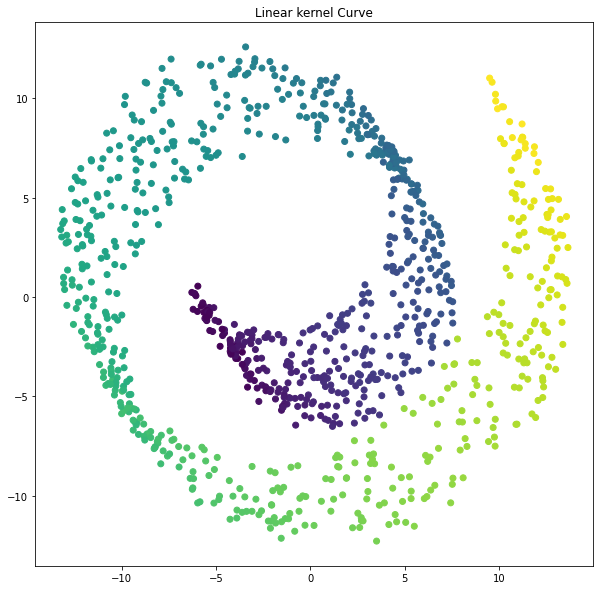

In [7]:
#Plot the kPCA results of applying the linear kernel (2 points), a RBF kernel (2 points), and a sigmoid kernel (2 points) from (3).

#Linear Kernel Graph
fig_swiss_linear = plt.figure(figsize=(10,10))
ax = fig_swiss_linear.add_subplot(111)
ax.scatter(X_linear_kpca[:, 0], X_linear_kpca[:, 1], c = Y_swiss)
plt.title('Linear kernel Curve')
plt.show()



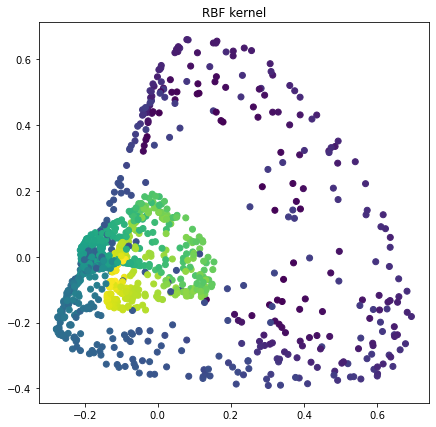

In [8]:
#RBF Kernel Graph
fig_swiss_rbf = plt.figure(figsize=(7,7))
ax = fig_swiss_rbf.add_subplot(111)
ax.scatter(X_rbf_kpca[:, 0], X_rbf_kpca[:, 1], c = Y_swiss)
plt.title('RBF kernel')
plt.show()



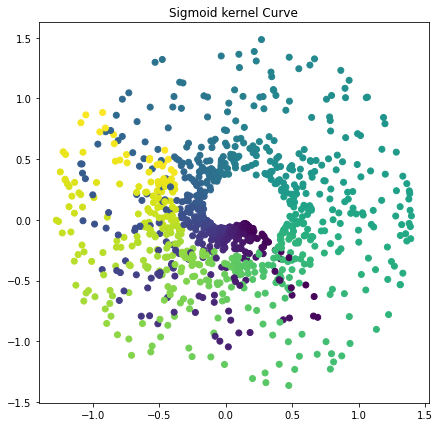

In [9]:
#Sigmoid Kernel Graph
fig_swiss_sigmoid = plt.figure(figsize=(7,7))
ax = fig_swiss_sigmoid.add_subplot(111)
ax.scatter(X_sigmoid_kpca[:, 0], X_sigmoid_kpca[:, 1], c = Y_swiss)
plt.title('Sigmoid kernel Curve')
plt.show()




In [10]:
#Using kPCA and a kernel of your choice, apply Logistic Regression for classification. 
#Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline. 
#Print out best parameters found by GridSearchCV.

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(multi_class="multinomial",solver="lbfgs", random_state=42, max_iter=1000))
])
param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["linear","rbf", "sigmoid"]
    }]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_swiss.astype(int), Y_swiss.astype(int))


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=1000,
                                                           multi_class='multinomial',
                                                           random_state=42))]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['linear', 'rbf', 'sigmoid']}])

In [12]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kpca__gamma,param_kpca__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.412936,0.074251,0.004298,0.001215,0.03,linear,"{'kpca__gamma': 0.03, 'kpca__kernel': 'linear'}",0.589820,0.525526,0.564565,0.559970,0.026449,11
1,0.074628,0.039094,0.007352,0.002272,0.03,rbf,"{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}",0.404192,0.456456,0.432432,0.431027,0.021360,23
2,0.092720,0.038389,0.012834,0.004509,0.03,sigmoid,"{'kpca__gamma': 0.03, 'kpca__kernel': 'sigmoid'}",0.751497,0.762763,0.798799,0.771020,0.020174,1
3,0.413209,0.162782,0.005575,0.003725,0.032222,linear,"{'kpca__gamma': 0.03222222222222222, 'kpca__ke...",0.589820,0.525526,0.561562,0.558969,0.026312,19
4,0.059782,0.003725,0.009769,0.002490,0.032222,rbf,"{'kpca__gamma': 0.03222222222222222, 'kpca__ke...",0.395210,0.447447,0.423423,0.422027,0.021349,25
5,0.055974,0.008251,0.014565,0.001779,0.032222,sigmoid,"{'kpca__gamma': 0.03222222222222222, 'kpca__ke...",0.748503,0.756757,0.786787,0.764016,0.016451,2
6,0.400582,0.077716,0.003541,0.000398,0.034444,linear,"{'kpca__gamma': 0.034444444444444444, 'kpca__k...",0.589820,0.525526,0.564565,0.559970,0.026449,11
7,0.045824,0.003536,0.007425,0.001689,0.034444,rbf,"{'kpca__gamma': 0.034444444444444444, 'kpca__k...",0.383234,0.444444,0.426426,0.418035,0.025684,27
8,0.049314,0.001591,0.009259,0.000260,0.034444,sigmoid,"{'kpca__gamma': 0.034444444444444444, 'kpca__k...",0.745509,0.756757,0.777778,0.760015,0.013374,3
9,0.380322,0.082609,0.005543,0.003312,0.036667,linear,"{'kpca__gamma': 0.03666666666666667, 'kpca__ke...",0.589820,0.525526,0.564565,0.559970,0.026449,11


In [13]:
pd.DataFrame(grid_search.cv_results_).keys()


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_kpca__gamma', 'param_kpca__kernel', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [14]:
#6. Plot the results from using GridSearchCV in (5). [2 points]
print(f'Best Param: {grid_search.best_params_}')


Best Param: {'kpca__gamma': 0.03, 'kpca__kernel': 'sigmoid'}


In [15]:
print(f'Best Estimator: {grid_search.best_estimator_}')


Best Estimator: Pipeline(steps=[('kpca',
                 KernelPCA(gamma=0.03, kernel='sigmoid', n_components=2)),
                ('log_reg',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    random_state=42))])


In [16]:
print(f'Best Score: {grid_search.best_score_}')


Best Score: 0.7710195225165285


In [17]:
print(f'CV Result: {grid_search.cv_results_}')

CV Result: {'mean_fit_time': array([0.41293581, 0.07462835, 0.09272003, 0.4132088 , 0.05978211,
       0.05597369, 0.40058152, 0.04582445, 0.04931402, 0.38032174,
       0.09013049, 0.07436927, 0.5010256 , 0.06831566, 0.0728244 ,
       0.43086958, 0.07112495, 0.07433009, 0.42931541, 0.0696791 ,
       0.07520723, 0.40103332, 0.06726456, 0.07521311, 0.48815481,
       0.0792501 , 0.0672845 , 0.5137101 , 0.05400618, 0.06544113]), 'std_fit_time': array([0.07425056, 0.0390935 , 0.03838876, 0.16278206, 0.00372517,
       0.00825123, 0.07771588, 0.00353604, 0.00159111, 0.08260872,
       0.05189212, 0.02532   , 0.06644978, 0.01251255, 0.03530368,
       0.0291443 , 0.03483189, 0.01376581, 0.09492625, 0.02279348,
       0.01334311, 0.08185125, 0.04276516, 0.02128228, 0.08095114,
       0.04267573, 0.01807049, 0.14823772, 0.0103265 , 0.02108587]), 'mean_score_time': array([0.00429805, 0.00735164, 0.01283367, 0.00557494, 0.00976904,
       0.01456499, 0.00354067, 0.00742459, 0.00925938, 0.0055

<AxesSubplot:title={'center':'Grid search results'}, xlabel='kpca__gamma', ylabel='Mean score'>

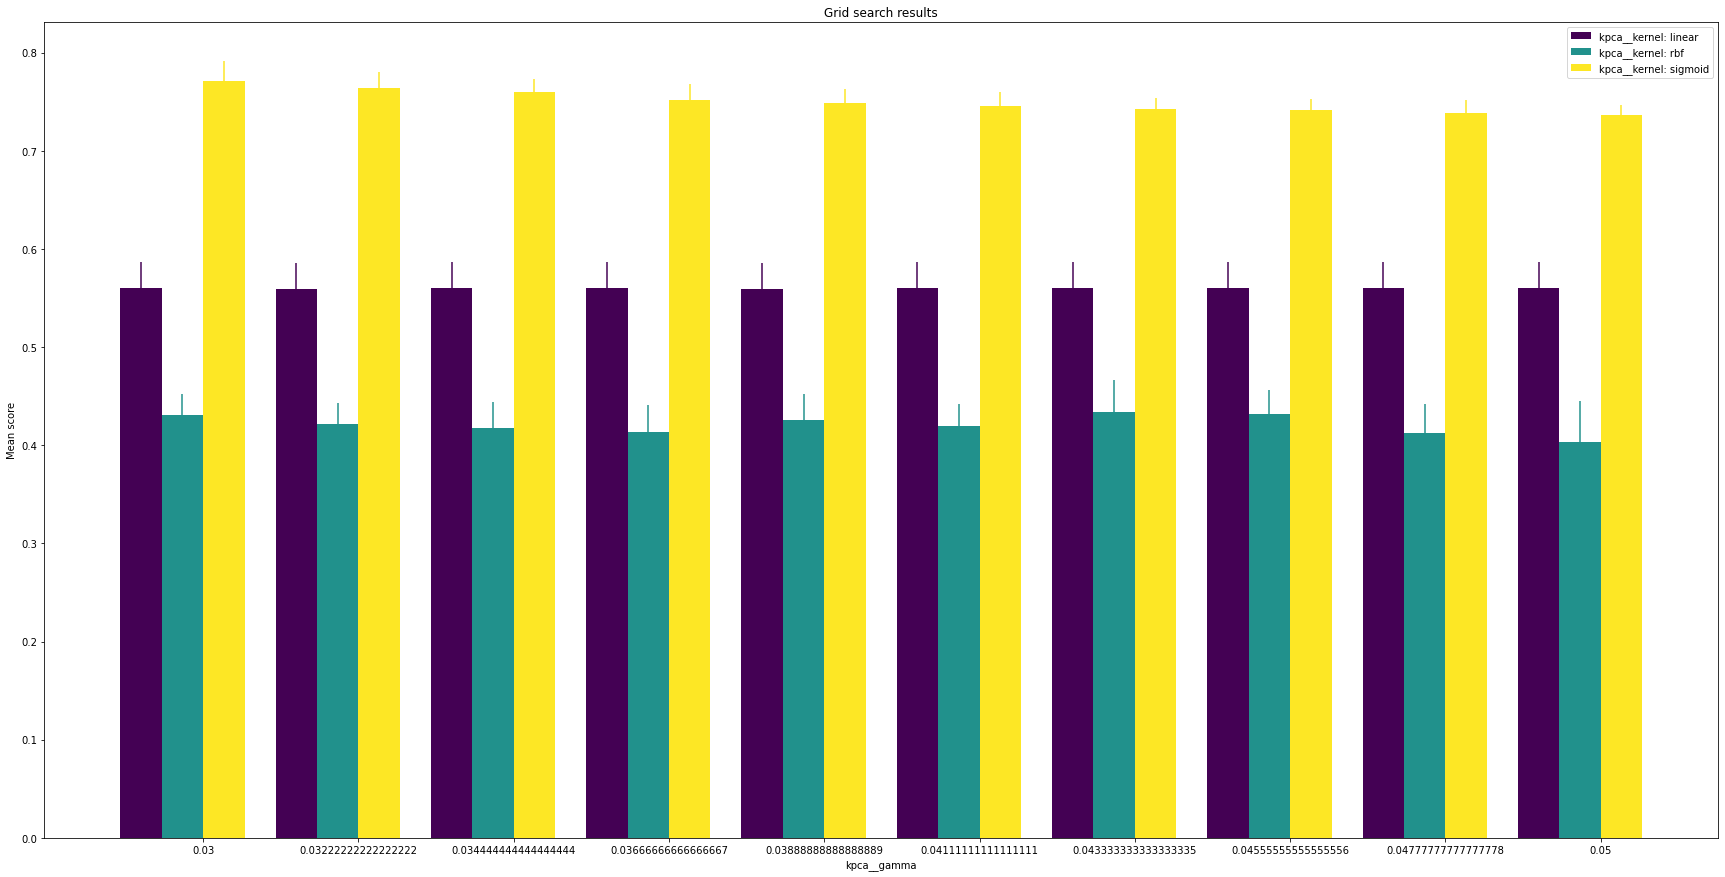

In [18]:
from sklearn_evaluation import plot
plt.rcParams['figure.figsize'] = [30, 15]
plot.grid_search(grid_search.cv_results_,change="kpca__gamma",kind='bar')

<AxesSubplot:title={'center':'Grid search results'}, xlabel='kpca__gamma', ylabel='Mean score'>

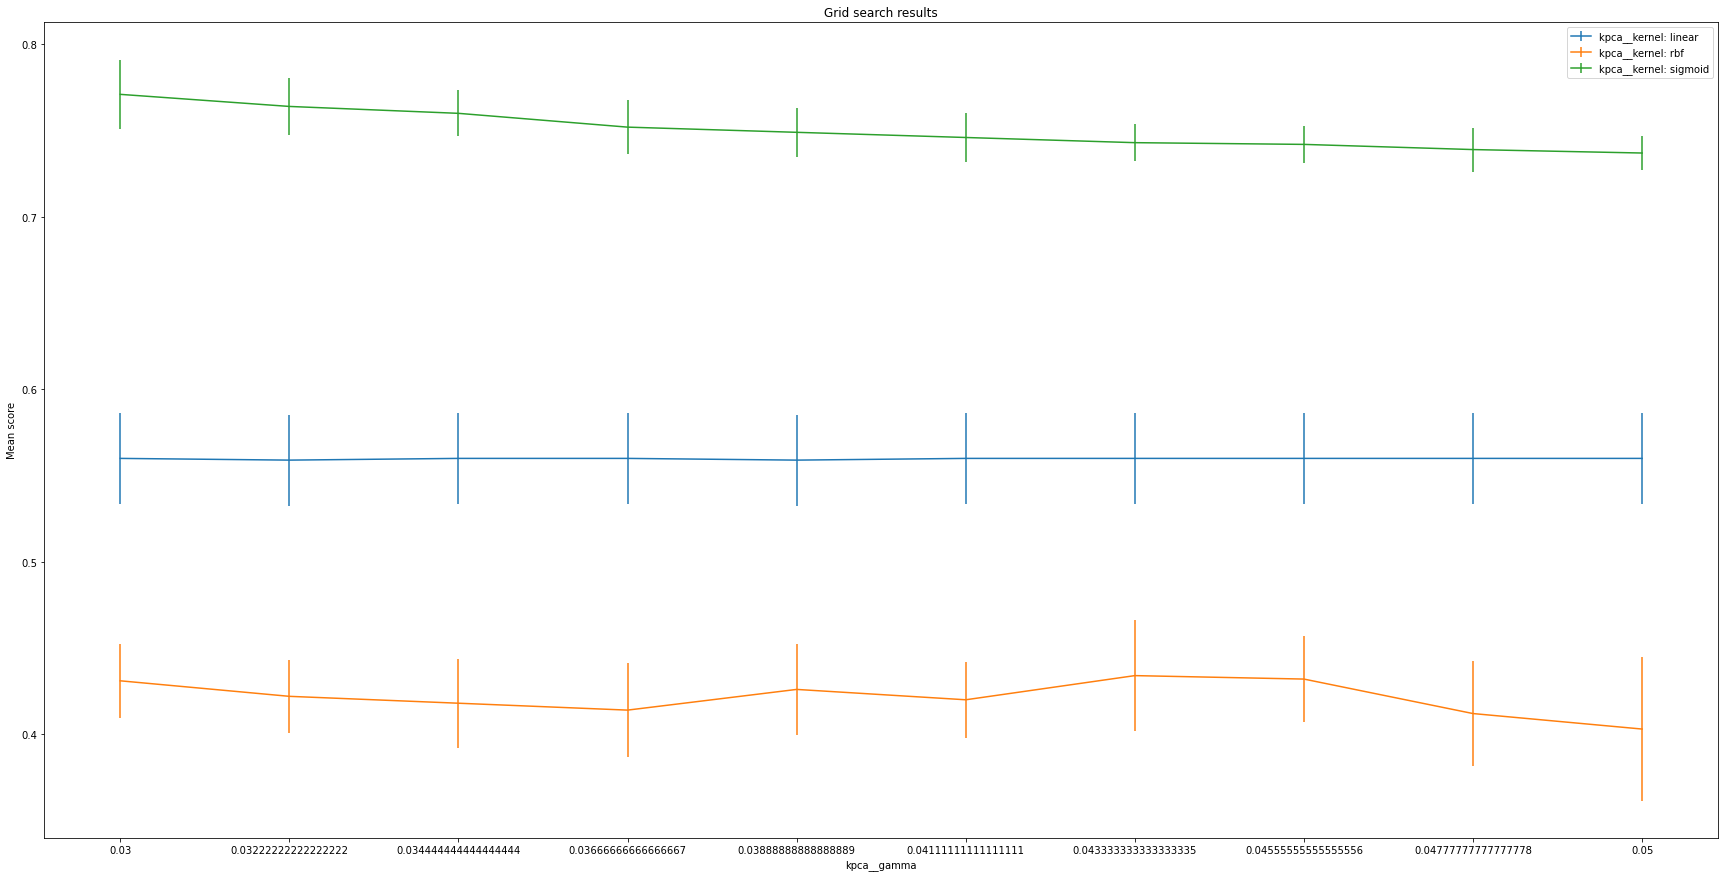

In [19]:
plt.rcParams['figure.figsize'] = [30, 15]
plot.grid_search(grid_search.cv_results_,change="kpca__gamma",kind='line')

<AxesSubplot:>

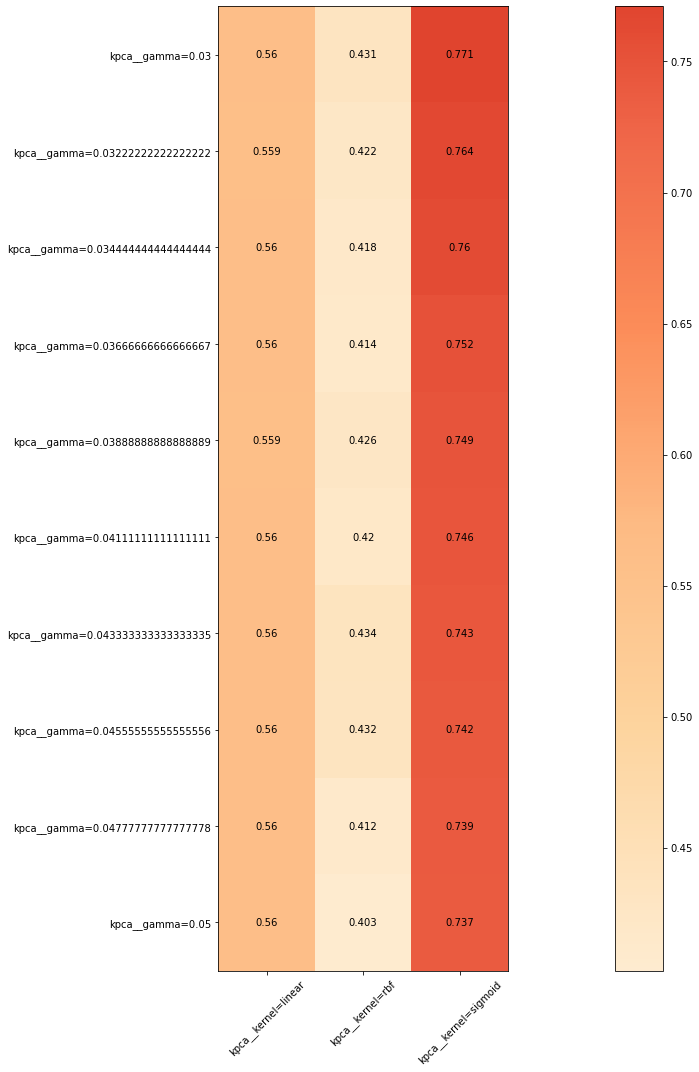

In [20]:
plot.grid_search(grid_search.cv_results_, change=('kpca__gamma', 'kpca__kernel'))